In [1]:
import numpy as np
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [3]:
data = pd.read_csv("Google_train_data.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


In [ ]:
data=data.dropna()

In [ ]:
import pandas as pd
from pandas_datareader import data as web
import plotly.graph_objects as go

In [ ]:
trace1 = {'x': data.Date,'open': data.Open,'close': data.Close,'high': data.High,
          'low': data.Low,'type': 'candlestick','name': 'Google','showlegend': True}

In [ ]:
data_canddle = [trace1]

layout = go.Layout({'title': {'text': 'Google(GOOG)','font': {'size': 15}}})

In [ ]:
fig = go.Figure(data_canddle ,layout)
fig.show()

In [ ]:
data_plot=data[data.columns[:-1]]

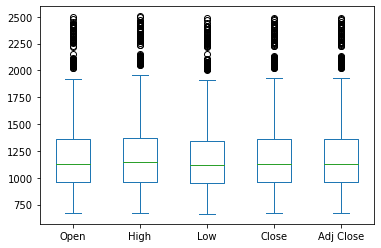

In [ ]:
data_plot.plot(kind='box')

In [ ]:
trainData = data.iloc[:,4:5].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1258, 1)

In [ ]:
x_train = []
y_train = []

for i in range (30,1258):
  x_train.append(trainData[i-30:i,0])
  y_train.append(trainData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1228, 30, 1)

In [ ]:
#400,300,200 88
#400,300,100 85
#400,300,150  89
#400,300,150,50 92
#400,300,150,75 92
model = Sequential()
model.add(LSTM(units=400,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(units=300,return_sequences=True))
model.add(LSTM(units=150,return_sequences=True))
model.add(LSTM(units=100,return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model_trained = keras.models.load_model('92_accuracy_wala_model.h5')

In [ ]:
history = model.fit(x_train,y_train , epochs = 50, batch_size=32, verbose=1)
#history = model.fit(x_train,y_train ,validation_split=0.2, epochs = 30, batch_size=32, verbose=1)

Epoch 1/50
39/39 [==============================] - 39s 582ms/step - loss: 0.0171
Epoch 2/50
39/39 [==============================] - 17s 440ms/step - loss: 0.0013
Epoch 3/50
39/39 [==============================] - 17s 446ms/step - loss: 0.0011
Epoch 4/50
39/39 [==============================] - 17s 442ms/step - loss: 0.0016
Epoch 5/50
39/39 [==============================] - 18s 456ms/step - loss: 0.0010
Epoch 6/50
39/39 [==============================] - 20s 504ms/step - loss: 0.0013
Epoch 7/50
39/39 [==============================] - 17s 443ms/step - loss: 9.2968e-04
Epoch 8/50
39/39 [==============================] - 18s 460ms/step - loss: 8.7599e-04
Epoch 9/50
39/39 [==============================] - 18s 456ms/step - loss: 0.0011
Epoch 10/50
39/39 [==============================] - 19s 477ms/step - loss: 8.2786e-04
Epoch 11/50
39/39 [==============================] - 17s 444ms/step - loss: 7.8615e-04
Epoch 12/50
39/39 [==============================] - 18s 469ms/step - loss: 8.49

In [ ]:
#model.save("93_accuracy_wala_model.h5")

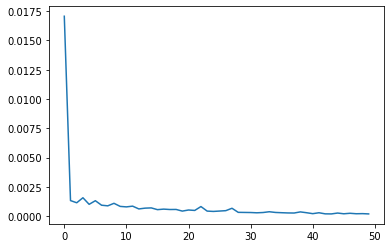

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
testData=pd.read_csv("GOOG_test.csv")
testData['Close']=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[30:,0:].values

In [ ]:
testData.shape

(253, 1)

In [ ]:
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled =sc.transform(inputClosing)
inputClosing_scaled.shape

(253, 1)

In [ ]:
x_test = []
length = len(testData)
timestep = 30


for i in range (timestep,length):
  x_test.append(inputClosing_scaled[i-timestep:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(223, 30, 1)

In [ ]:
#y_prediction = model.predict(x_test)

NotImplementedError: ignored

In [ ]:
y_pred = model_trained.predict(x_test)

In [ ]:
y_pred.shape

(223, 1)

In [ ]:
predicted_price = sc.inverse_transform(y_pred)

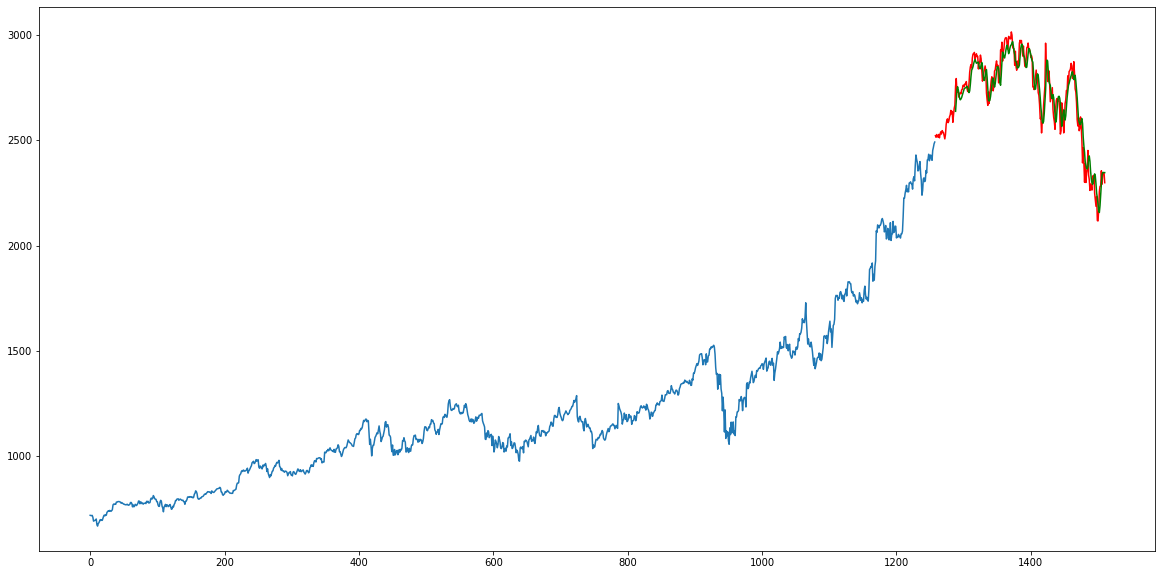

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(data.Close)),data.Close)
plt.plot(np.arange(len(data.Close),len(data.Close)+len(testData.Close)),testData.Close,color='red',label= 'actual')
plt.plot(np.arange(len(data.Close)+30,len(data.Close)+len(testData.Close)),predicted_price,color = 'green',label='predicted')


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, predicted_price))

61.64267557690271

In [ ]:
r2_score(y_test, predicted_price)

0.9148923873680253

In [ ]:
round(r2_score(y_test, predicted_price)*100,1)

91.5

In [ ]:
last_train_batch = inputClosing_scaled[-30:]
last_train_batch = last_train_batch.reshape((1, 30, 1))
model.predict(last_train_batch)

array([[0.9358396]], dtype=float32)

In [ ]:
test_predictions = []

first_eval_batch = inputClosing_scaled[-30:]
current_batch = first_eval_batch.reshape((1, 30, 1))

for i in range(30):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = sc.inverse_transform(test_predictions)

In [ ]:
true_predictions.shape

(30, 1)

In [ ]:
inputClosing_scaled.shape

(253, 1)

In [ ]:
import pandas as pd
from pandas_datareader import data as web
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv("GOOG_train.csv")

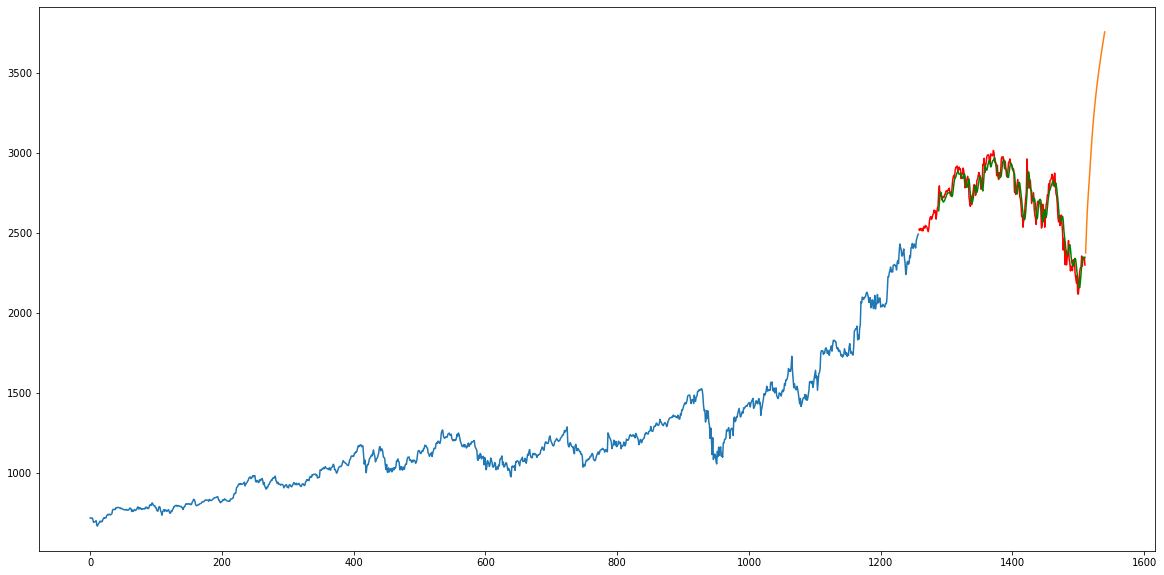

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(data.Close)),data.Close)
plt.plot(np.arange(len(data.Close),len(data.Close)+len(testData.Close)),testData.Close,color='red',label= 'actual')
plt.plot(np.arange(len(data.Close)+30,len(data.Close)+len(testData.Close)),predicted_price,color = 'green',label='predicted')
plt.plot(np.arange(len(data.Close)+len(testData.Close),len(data.Close)+len(testData.Close)+30),true_predictions)

ARIMA for future prediction

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 9.2 MB/s 
     |████████████████████████████████| 9.8 MB 33.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv("GOOG_train.csv")
test=pd.read_csv("GOOG_test.csv")

In [ ]:
train_list=train["Close"]
train_list=list(train_list)
test_list=test["Close"]
test_list=list(test_list)

In [ ]:
train_list.extend(test_list)
len(train_list)

1511

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_list)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.6136582483986682
p-value: 0.8678658599134335


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
step_fit = auto_arima(train_list,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14347.096, Time=1.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14353.081, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14344.966, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14345.393, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14353.185, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14346.190, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14344.779, Time=1.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14346.779, Time=1.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14346.779, Time=1.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14346.728, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14345.148, Time=0.20 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 7.408 seconds


In [ ]:
#454
train= train_list[:-253]
test = train_list[-253:]
print(len(train),len(test))

1258 253


In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_list, order=(1,1,1))
result = model.fit()
step_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1511
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -7168.390
Date:                Sun, 17 Jul 2022   AIC                          14344.779
Time:                        07:57:21   BIC                          14366.059
Sample:                             0   HQIC                         14352.704
                               - 1511                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5704      1.044      1.504      0.133      -0.476       3.617
ar.L1         -0.4993      0.135     -3.690      0.000      -0.764      -0.234
ma.L1          0.4209      0.140      2.997      0.003       0.146       0.696
sigma2       777.9779     14.115     55.116      0.000     750.313     805.643
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2307.80
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.50   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end=len(train)+len(test)-1
pred = result.predict(start=start,end=end)

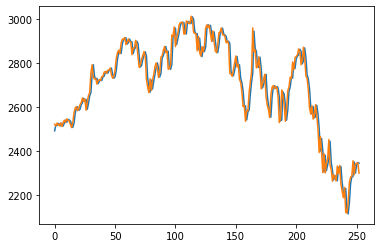

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pred)
plt.plot(test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
sqrt(mean_squared_error(test,pred))

47.35160303130853

In [ ]:
r2_score(test, pred)

0.9466613348553223

In [ ]:
prediction = result.predict(start=len(train_list),end=len(train_list)+30)

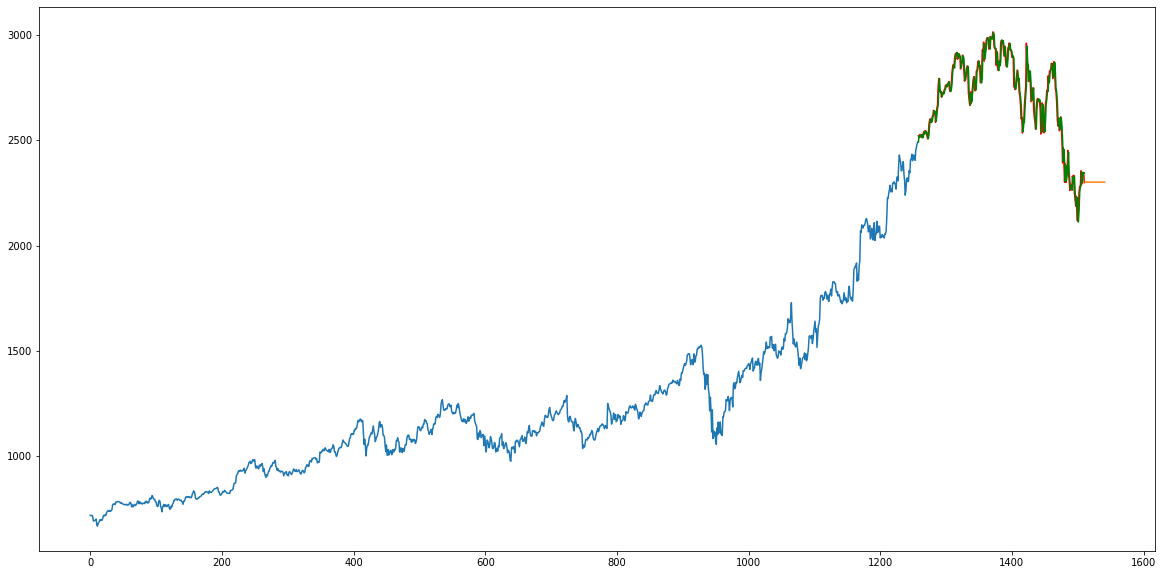

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(train)),train)
plt.plot(np.arange(len(train),len(train)+len(test)),test,color='red')
plt.plot(np.arange(len(train),len(train)+len(test)),pred,color = 'green')
plt.plot(np.arange(len(train)+len(test),len(train)+len(test)+31),prediction)